In [2]:
# Please don't change this cell but do run it.
import babypandas as bpd
import numpy as np
import matplotlib.pyplot as plt

import otter
grader = otter.Notebook()

## Outline

Use this outline to help you quickly navigate to the part of the project you're working on:
- [Part 0: Understanding the data](#part0)  
    - [Question 0: Data cleaning](#q0)  
- [Part 1: Never trust the internet](#part1)  
    - [Question 1: Just a rumor, or insider information?](#q1)  
- [Part 2: Comparing demographics](#part2)
    - [Question 2: DC vs. Marvel](#q2)
    - [Question 3: Male vs. female](#q3)
    - [Question 4: More comparisons](#q4)
- [Part 3: Fact or cap?](#part3)
    - [Question 5: What could have been...](#q5)
    - [Question 6: Nonbinary characters](#q6)
- [Part 4: Fun and games](#part4)
    - [Question 7: Guess who?](#q7)
    - [Question 8: BuzzFeed](#q8)
    - [Question 9: Action figure bundles](#q9)

<a name='part0'></a>

## Part 0: Understanding the data 👩‍💻

There are two major comic publishing companies in the US, Marvel Comics and DC Comics. These companies have been rivals for decades, and devoted comic fans will not hesitate to share their opinions about which company is better. As [one article](https://www.gamesradar.com/marvel-dc-rivalry-is-over/) put it, 

>*For decades Marvel and DC were the Coke and Pepsi … the McDonald's and Burger King … the Yankees and Red Sox of superhero publishers.* 

<img src="./images/marvel_vs_dc.jpg" width=700/>

In this project, we'll work with data gathered from [Marvel Wikia](http://marvel.wikia.com/Main_Page) and [DC Wikia](http://dc.wikia.com/wiki/Main_Page), which are publicly editable database of all things Marvel and DC. This means our data was inputted by adoring comic fans. Our data was collected from these sites in 2014 by [FiveThirtyEight](https://fivethirtyeight.com/) and is publicly available [here](https://github.com/fivethirtyeight/data/tree/master/comic-characters).  There are two data files `dc-wikia-data.csv` and `marvel-wikia-data.csv`. FiveThirtyEight describes the columns in these data files as below.

| Variable           | Definition |
| :---               |    :----   |
| `page_id`          | The unique identifier for that characters page within the wikia |
| `name`             | The name of the character |
| `urlslug`          | The unique url within the wikia that takes you to the character |
| `ID`               | The identity status of the character (Secret Identity, Public identity, [on marvel only: No Dual Identity])|
| `ALIGN`            | If the character is Good, Bad or Neutral       |
| `EYE`              | Eye color of the character        |
| `HAIR`             | Hair color of the character       |
| `SEX`              | Sex of the character (e.g. Male, Female, etc.)        |
| `GSM`              | If the character is a gender or sexual minority (e.g. Homosexual characters, bisexual characters)       |
| `ALIVE`            | If the character is alive or deceased       |
| `APPEARANCES`      | The number of appareances of the character in comic books (as of Sep. 2, 2014. Number will become increasingly out of date as time goes on.)      |
| `FIRST APPEARANCE`   | The month and year of the character's first appearance in a comic book, if available       |
| `YEAR`      | The year of the character's first appearance in a comic book, if available       |



We've modified the original data to fill in missing values.
- For characters with no available data for `'ID'`, `'ALIGN'`, `'EYE'`, `'HAIR'`, `'SEX'`, or `'ALIVE'`, we've replaced missing values with the string `'Data Unavailable'`. 
- The original data only included an entry in the `'GSM'` column for gender or sexual minorities. We've replaced missing values here with the string `'Not Minority'`.
- For characters with no available data for `'APPEARANCES'` or `'YEAR'`, we've replaced missing values with zeros. 

Keep in mind that since our data came from publicly editable databases, the data can (and in fact, does) have mistakes. We'll ignore these mistakes and just analyze the data as it's given. Don't try to correct any issues with the data or you may cause problems for our Gradescope autograder.

Let's read in the data and see what we'll be working with.

In [3]:
dc_raw = bpd.read_csv('data/dc-wikia-data.csv')
dc_raw

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Not Minority,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Not Minority,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,1237.0,"1940, April",1940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,66302,Nadine West (New Earth),\/wiki\/Nadine_West_(New_Earth),Public Identity,Good Characters,Data Unavailable,Data Unavailable,Female Characters,Not Minority,Living Characters,0.0,NaN,0.0
6892,283475,Warren Harding (New Earth),\/wiki\/Warren_Harding_(New_Earth),Public Identity,Good Characters,Data Unavailable,Data Unavailable,Male Characters,Not Minority,Living Characters,0.0,NaN,0.0
6893,283478,William Harrison (New Earth),\/wiki\/William_Harrison_(New_Earth),Public Identity,Good Characters,Data Unavailable,Data Unavailable,Male Characters,Not Minority,Living Characters,0.0,NaN,0.0
6894,283471,William McKinley (New Earth),\/wiki\/William_McKinley_(New_Earth),Public Identity,Good Characters,Data Unavailable,Data Unavailable,Male Characters,Not Minority,Living Characters,0.0,NaN,0.0


In [4]:
marvel_raw = bpd.read_csv('data/marvel-wikia-data.csv')
marvel_raw

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Not Minority,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Not Minority,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Not Minority,Living Characters,2258.0,Nov-50,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,Not Minority,Living Characters,0.0,NaN,0.0
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,Not Minority,Living Characters,0.0,NaN,0.0
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,Not Minority,Living Characters,0.0,NaN,0.0
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,Data Unavailable,Data Unavailable,Male Characters,Not Minority,Living Characters,0.0,NaN,0.0


<a name='q0'></a>
### Question 0: Data cleaning 🧹

**Question 0.1.** (1 point) There are a couple of modifications we should make to `dc_raw` and `marvel_raw` to clean them before we can proceed with our analyses.
- We will not be using the `'page_id'`, `'urlslug'`, and `'FIRST APPEARANCE'` columns, so these should be dropped.
- `'APPEARANCES'` and `'YEAR'` are both stored as strings, but we need them to be stored as `int`s.


Below, complete the implementation of the function `clean_dataframe`, which has a single argument, `df`, and returns a cleaned version of `df`, as detailed above. Then, use `clean_dataframe` to clean both `dc_raw` and `marvel_raw`, and store the cleaned DataFrames in the variables `dc_clean` and `marvel_clean`, respectively.

<!--
BEGIN QUESTION
name: q0_1
points: 1
-->

In [5]:
def clean_dataframe(df):
    '''Returns a cleaned version of the input DataFrame df.'''
    return df.drop(columns = ['page_id', 'urlslug', 'FIRST APPEARANCE']) \
    .assign(APPEARANCES = df.get('APPEARANCES').apply(int), YEAR = df.get('YEAR').apply(int))
    
dc_clean = clean_dataframe(dc_raw)
marvel_clean = clean_dataframe(marvel_raw)

In [6]:
dc_clean

,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,YEAR
0,Batman (Bruce Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,3093,1939
1,Superman (Clark Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,2496,1986
2,Green Lantern (Hal Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Not Minority,Living Characters,1565,1959
3,James Gordon (New Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Not Minority,Living Characters,1316,1987
4,Richard Grayson (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,1237,1940
...,...,...,...,...,...,...,...,...,...,...
6891,Nadine West (New Earth),Public Identity,Good Characters,Data Unavailable,Data Unavailable,Female Characters,Not Minority,Living Characters,0,0
6892,Warren Harding (New Earth),Public Identity,Good Characters,Data Unavailable,Data Unavailable,Male Characters,Not Minority,Living Characters,0,0
6893,William Harrison (New Earth),Public Identity,Good Characters,Data Unavailable,Data Unavailable,Male Characters,Not Minority,Living Characters,0,0
6894,William McKinley (New Earth),Public Identity,Good Characters,Data Unavailable,Data Unavailable,Male Characters,Not Minority,Living Characters,0,0


In [7]:
grader.check("q0_1")

q0_1 results: All test cases passed!

**Question 0.2.** (1 point)  Currently, both `dc_clean` and `marvel_clean` are indexed by the default `babypandas` index of 0, 1, 2, 3, etc. We want to try to find a more informative index. To do that, we need to find a column whose values are all distinct.

Below, complete the implementation of the function `all_distinct`, which takes in a DataFrame (`df`) and the name of a column in that DataFrame (`column_name`), and returns `True` if all values in that column are distinct, and `False` otherwise.

_Hint:_ Use [`np.unique`](https://numpy.org/doc/stable/reference/generated/numpy.unique.html).

<!--
BEGIN QUESTION
name: q0_2
points: 1
-->

In [8]:
def all_distinct(df, column_name):
    '''Determines whether all values in a given column of a given DataFrame are distinct.'''
    return np.count_nonzero(np.unique(df.get(column_name).to_numpy())) == df.get(column_name).shape[0]

In [9]:
grader.check("q0_2")

q0_2 results: All test cases passed!

To check your work, run the following two cells.

In [10]:
all_distinct(dc_clean, 'name')

True

In [11]:
all_distinct(marvel_clean, 'name')

True

If your implementation of `all_distinct` is correct, you should see that the `'name'` of each DC character is unique, and the `'name'` of each Marvel character is unique, so `'name'` is a good choice of index. Run the next cell to create new DataFrames `dc` and `marvel` indexed by name. Moving forward, we'll work with the `dc` and `marvel` DataFrames.

In [12]:
dc = dc_clean.set_index('name') 
marvel = marvel_clean.set_index('name') 

<a name='part1'></a>

## Part 1: Never trust the internet 💻

<a name='q1'></a>
### Question 1: Just a rumor, or insider information? 👀

You spend a lot of time in online forums for comic lovers. One day, you see a post by a user named "DC Bigshot" who claims to be a DC employee. DC Bigshot claims that when DC creates a new male character, they'll make him a bad character with probability 50%, a good character with probability 40%, and a neutral character with probability 10%. You want to determine whether this claim is supported by the data, so you know whether to trust DC Bigshot's claims in general.

**Question 1.1.** (1 point) Assign `dc_align` to a DataFrame that only includes the male characters from `dc` that are considered `'Bad Characters'`, `'Good Characters'`, or `'Neutral Characters'`.

<!--
BEGIN QUESTION
name: q1_1
points: 1
-->

In [13]:
dc_align = dc[(dc.get('SEX') == 'Male Characters') & ((dc.get('ALIGN') == 'Bad Characters') 
                                                      | (dc.get('ALIGN') == 'Good Characters') 
                                                      | (dc.get('ALIGN') == 'Neutral Characters'))]
dc_align

,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,YEAR
name,,,,,,,,,
Batman (Bruce Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,3093,1939
Superman (Clark Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,2496,1986
Green Lantern (Hal Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Not Minority,Living Characters,1565,1959
James Gordon (New Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Not Minority,Living Characters,1316,1987
Richard Grayson (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,1237,1940
...,...,...,...,...,...,...,...,...,...
James Garfield (New Earth),Public Identity,Good Characters,Data Unavailable,Data Unavailable,Male Characters,Not Minority,Living Characters,0,0
Warren Harding (New Earth),Public Identity,Good Characters,Data Unavailable,Data Unavailable,Male Characters,Not Minority,Living Characters,0,0
William Harrison (New Earth),Public Identity,Good Characters,Data Unavailable,Data Unavailable,Male Characters,Not Minority,Living Characters,0,0


In [14]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** (1 point) Assign `observed_dist` to an array containing the proportion of male DC characters that are bad, good, and neutral (in that order). Since we'll only consider these three values for `'ALIGN'`, the three proportions in your array should sum to one.

<!--
BEGIN QUESTION
name: q1_2
points: 1
-->

In [15]:
bad = np.count_nonzero(dc_align.get('ALIGN') == 'Bad Characters')
good = np.count_nonzero(dc_align.get('ALIGN') == 'Good Characters')
neut = np.count_nonzero(dc_align.get('ALIGN') == 'Neutral Characters')
observed_dist = np.array([bad, good, neut])/dc_align.shape[0]
observed_dist

array([0.50237288, 0.41649718, 0.08112994])

In [16]:
grader.check("q1_2")

q1_2 results: All test cases passed!

We now have everything we need to perform a hypothesis test for the distribution of "goodness" among male DC characters. Our hypotheses are as follows:

- **Null hypothesis:** Among male characters from DC, there is a 50% chance that the character is bad, a 40% chance the character is good, and a 10% chance that the character is neutral. Any observed differences from this distribution are due to chance.

- **Alternative hypothesis:** Among male characters from DC, there is a different distribution of bad, good, and neutral characters.

In each iteration of our simulation, we will draw the same number of characters as there are in `dc_align` at random from a population that is 50% bad, 40% good, and 10% neutral. We will then determine the proportion of characters in this sample that are bad, good, and neutral; this will give us an observed categorical distribution. We will compare this distribution to the distribution of goodness according to the null, `[0.5, 0.4, 0.1]`, using the total variation distance (TVD) as our **test statistic**.

Below, we've provided an implementation of the total variation distance.

In [17]:
def total_variation_distance(dist1, dist2):
    '''Computes the TVD between two categorical distributions, 
       assuming the categories appear in the same order.'''
    return np.abs((dist1 - dist2)).sum() / 2

The next cell calculates the the total variation distance between our observed distribution and the null distribution, which we'll call `align_model`.

In [18]:
align_model = [0.5, 0.4, 0.1]
observed_tvd = total_variation_distance(observed_dist, align_model)
observed_tvd

0.018870056497175124

**Question 1.3.** (2 points) Generate 10,000 simulated values of the test statistic using the approach described above and place them in an array called `tvds`.

<!--
BEGIN QUESTION
name: q1_3
points: 2
-->

In [19]:
np.random.multinomial(dc_align.shape[0], align_model).sum()

4425

In [20]:
np.random.seed(510717) # Don't change this!

tvds = np.array([])


for i in np.arange(10000):
    dist = np.random.multinomial(dc_align.shape[0], align_model)/dc_align.shape[0]
    nt = total_variation_distance(dist, align_model)
    tvds = np.append(tvds, nt)

# Just display the first ten TVDs.
tvds[:10]

array([0.00700565, 0.0079096 , 0.00881356, 0.0080226 , 0.00169492,
       0.00531073, 0.00610169, 0.01084746, 0.00621469, 0.00666667])

In [21]:
grader.check("q1_3")

q1_3 results: All test cases passed!

Run the cell below to draw a histogram of your simulated TVDs, with a red line drawn at the observed TVD.

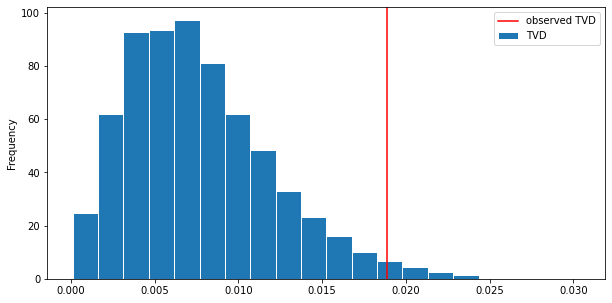

In [22]:
bpd.DataFrame().assign(TVD=tvds).plot(kind='hist', density=True, bins=20, ec='w', figsize=(10, 5));
plt.axvline(observed_tvd, color='red', label='observed TVD');
plt.legend();

**Question 1.4.** (1 point) Compute the p-value of our hypothesis test by computing the proportion of times in our simulation that we saw a TVD equal to the observed TVD or more extreme in the direction of the alternative hypothesis. Assign your result to `align_p`.

<!--
BEGIN QUESTION
name: q1_4
points: 1
-->

In [23]:
align_p = np.count_nonzero(tvds >= observed_tvd)/len(tvds)
align_p

0.0206

In [24]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 1.5.** (1 point) What can we conclude from the result of this hypothesis test? Assign `q1_conclusion` to 1, 2, or 3.

1. Using a 5% cutoff, we reject the null hypothesis that among male characters from DC, there is a 50% chance that the character is bad, a 40% chance the character is good, and a 10% chance that the character is neutral.

2. Using a 5% cutoff, we accept the null hypothesis.

3. Using a 5% cutoff, the null hypothesis is consistent with what we observed.

<!--
BEGIN QUESTION
name: q1_5
points: 1
-->

In [25]:
q1_conclusion = 1

In [26]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Question 1.6.** (0 points, but needed for later) Set the variable `new_model` to an array containing proportions for `[bad, good, neutral]` such that if we did another hypothesis test with the following hypotheses, the conclusion would be different than the hypothesis test performed above. 

- **Null hypothesis:** Among male characters from DC, the distribution of bad, good, and neutral characters is given by the proportions in `new_model`.

- **Alternative hypothesis:** Among male characters from DC, there is a different distribution of bad, good, and neutral characters.

<!--
BEGIN QUESTION
name: q1_6
points: 0
-->

In [27]:
new_model = observed_dist
new_model

array([0.50237288, 0.41649718, 0.08112994])

In [28]:
grader.check("q1_6")

q1_6 results: All test cases passed!

**Question 1.7.** (0 points, but needed for later) To verify that you chose `new_model` correctly, conduct a hypothesis test using as your test statistic the total variation distance between the observed distribution and `new_model`.

Generate 10,000 values of the test statistic and place them in an array called `new_tvds`. You should be able to do this by taking your code from 1.3 and making only small changes.

<!--
BEGIN QUESTION
name: q1_7
points: 0
-->

In [29]:
np.random.seed(432) # Don't change this!

new_tvds = np.array([])
for i in np.arange(10000):
    dist = np.random.multinomial(dc_align.shape[0], new_model)/dc_align.shape[0]
    nt = total_variation_distance(dist, new_model)
    new_tvds = np.append(new_tvds, nt)

# Just display the first ten TVDs.
new_tvds[:10]

array([0.00519774, 0.0119774 , 0.00519774, 0.01830508, 0.01062147,
       0.01084746, 0.00813559, 0.0119774 , 0.01220339, 0.00564972])

In [30]:
grader.check("q1_7")

q1_7 results: All test cases passed!

Again, we have provided code that plots a histogram with a red vertical line, allowing you to visualize the simulated estimates and observed TVD.

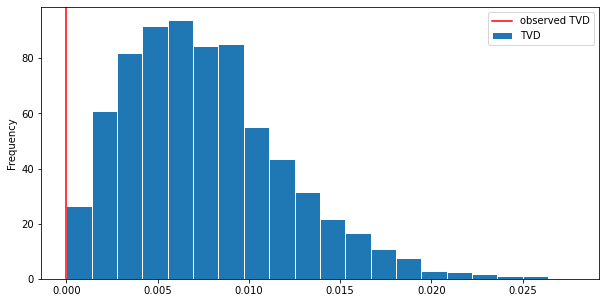

In [31]:
new_observed_tvd = total_variation_distance(observed_dist, new_model)

bpd.DataFrame().assign(TVD=new_tvds).plot(kind='hist', density=True, bins=20, ec='w', figsize=(10, 5));
plt.axvline(new_observed_tvd, color='red', label='observed TVD');
plt.legend();

**Question 1.8.** (3 points) Assign to `new_p` the p-value for this hypothesis test. Confirm that your hypothesis test has a different conclusion than before at the 0.05 significance level.

<!--
BEGIN QUESTION
name: q1_8
points: 3
-->

In [32]:
new_p = np.count_nonzero(new_tvds >= new_observed_tvd)/len(new_tvds)
new_p

1.0

In [33]:
grader.check("q1_8")

q1_8 results: All test cases passed!

<a name='part2'></a>

## Part 2: Comparing demographics 🙋🙋‍♂️

In this part, we will compare the goodness of characters from different groups, using permutation tests.

<a name='q2'></a>

### Question 2: DC vs. Marvel 🥊

Let's start by comparing the goodness of DC characters and the goodness of Marvel characters. Before we conduct our permutation test, we'll need to perform a bit of DataFrame manipulation to get our data in the right format.

**Question 2.1.** (1 point) Below, assign `all_characters` to a DataFrame with all characters from both comic companies. Make sure the rows for DC characters appear before the rows for Marvel characters. `all_characters` should include all of the columns in `dc` and `marvel`, plus an additional column called `'COMPANY'`, containing a string, either `'DC'` or `'Marvel'`. 

_Hint:_ You may find the function [`np.repeat`](https://numpy.org/doc/stable/reference/generated/numpy.repeat.html) and the DataFrame method [`.append`](https://babypandas.readthedocs.io/en/latest/_autosummary/bpd.DataFrame.append.html) useful.

<!--
BEGIN QUESTION
name: q2_1
points: 1
-->

In [34]:
all_characters = dc.assign(COMPANY = np.repeat('DC', dc.shape[0])).append(marvel.assign(COMPANY = np.repeat('Marvel', marvel.shape[0])))
all_characters

,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,YEAR,COMPANY
name,,,,,,,,,,
Batman (Bruce Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,3093,1939,DC
Superman (Clark Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,2496,1986,DC
Green Lantern (Hal Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Not Minority,Living Characters,1565,1959,DC
James Gordon (New Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Not Minority,Living Characters,1316,1987,DC
Richard Grayson (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,1237,1940,DC
...,...,...,...,...,...,...,...,...,...,...
Ru'ach (Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,Not Minority,Living Characters,0,0,Marvel
Thane (Thanos' son) (Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,Not Minority,Living Characters,0,0,Marvel
Tinkerer (Skrull) (Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,Not Minority,Living Characters,0,0,Marvel


In [35]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** (1 point) Create a new DataFrame, `all_characters_goodness`, which contains only the rows in `all_characters` where there is data in the `'ALIGN'` column (i.e., all of the rows where the value in `'ALIGN'` isn't `'Data Unavailable'`). 

`all_characters_goodness` should contain all of the columns in `all_characters` plus one additional column, called `'GOOD'`, that has:
- The value `1` for `'Good Characters'`
- The value `0` for `'Neutral Characters'` and `'Reformed Criminals'`
- The value `-1` for `'Bad Characters'`

_Hint:_ You may want to create your own function and use `.apply`.

<!--
BEGIN QUESTION
name: q2_2
points: 1
-->

In [36]:
def numgood(n):
    if n == 'Good Characters':
        return 1
    elif n == 'Bad Characters':
        return -1
    else:
        return 0

all_characters_goodness = all_characters[all_characters.get('ALIGN') != 'Data Unavailable'] 
all_characters_goodness = all_characters_goodness.assign(GOOD = all_characters_goodness.get('ALIGN').apply(numgood))
all_characters_goodness

,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,YEAR,COMPANY,GOOD
name,,,,,,,,,,,
Batman (Bruce Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,3093,1939,DC,1
Superman (Clark Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,2496,1986,DC,1
Green Lantern (Hal Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Not Minority,Living Characters,1565,1959,DC,1
James Gordon (New Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Not Minority,Living Characters,1316,1987,DC,1
Richard Grayson (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,1237,1940,DC,1
...,...,...,...,...,...,...,...,...,...,...,...
Ru'ach (Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,Not Minority,Living Characters,0,0,Marvel,-1
Thane (Thanos' son) (Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,Not Minority,Living Characters,0,0,Marvel,1
Tinkerer (Skrull) (Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,Not Minority,Living Characters,0,0,Marvel,-1


In [37]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Important:** The rest of the assignment will rely on both `all_characters` and `all_characters_goodness` being correct. Make sure you've passed all the grader checks for these questions before proceeding, and check your work carefully!

As stated above, we're interested in comparing characters from DC to characters from Marvel. We can start to do this by grouping `all_characters_goodness` by `'COMPANY'`:

In [38]:
all_characters_goodness.groupby('COMPANY').mean()

,APPEARANCES,YEAR,GOOD
COMPANY,,,
DC,22.406990,1970.522160,-0.010008
Marvel,18.033324,1885.468888,-0.153642


It appears that the DC characters we have in our dataset are more "good" than the Marvel characters in our dataset. However, we have to ask ourselves the question, "is this difference reflective of a difference in the population of all comic characters, or did it happen by chance in our sample?"

We'll conduct a permutation test to answer that very question, but before we do that, we need to create one more function to calculate the test statistic, the difference in means.

**Question 2.3.** (1 point) Complete the implementation of the function `diff_of_means`, which takes in five arguments:
- `df`, a DataFrame
- `group_column`, the name of a column in `df` that contains two distinct values
- `group_1` and `group_2`, the two distinct values in `group_column`
- `data_column`, a column containing numerical data

and returns the difference in the mean value of `data_column` for the two groups (do `group_1` mean minus `group_2` mean).

After that, use your function to assign `observed_diff` to the difference in mean goodness for DC and Marvel (do DC minus Marvel).

_Hint:_ You can verify that your code is correct by looking at the DataFrame displayed immediately above this question.

<!--
BEGIN QUESTION
name: q2_3
points: 1
-->

In [39]:
all_characters_goodness.groupby('COMPANY').mean().get('GOOD').loc['DC']

-0.010007942811755361

In [40]:
def diff_of_means(df, group_column, group_1, group_2, data_column):
    '''Returns the difference in the mean value of data_column for the groups in group_column. 
     The order is group_1 minus group_2.'''
    h = df.groupby(group_column).mean().get(data_column)
    return h.loc[group_1]-h.loc[group_2]
    
observed_diff = diff_of_means(all_characters_goodness, 'COMPANY', 'DC', 'Marvel', 'GOOD')
observed_diff

0.14363405070048293

In [41]:
grader.check("q2_3")

q2_3 results: All test cases passed!

We're now ready to run a permutation test to compare the goodness of DC characters to the goodness of Marvel characters. Our hypotheses are as follows:

- **Null hypothesis:** The goodness of DC characters and Marvel characters come from the same distribution.
- **Alternative hypothesis:** DC characters are more good than Marvel characters, on average.

**Question 2.4.** (2 points) 100 times, shuffle either the `'COMPANY'` or `'GOOD'` column in `all_characters_goodness`, and calculate the difference in mean goodness between the resulting DC characters and resulting Marvel characters (again, using DC minus Marvel). Store your differences in the array `differences`.

`all_characters_goodness` has lots of rows and takes a long time to shuffle, so we're only doing 100 shuffles. Ideally, we'd do more, but even 100 shuffles might take up to a couple of minutes to run.

_Note:_ We've defined a new DataFrame, `to_shuffle`, with only the columns relevant to this question. Feel free to use it if you'd like; you don't have to.

<!--
BEGIN QUESTION
name: q2_4
points: 2
-->

In [42]:
to_shuffle = all_characters_goodness.get(['COMPANY', 'GOOD'])

In [43]:
np.random.seed(4242) # Don't change this!

to_shuffle = all_characters_goodness.get(['COMPANY', 'GOOD'])

n_repetitions = 100 # This dataset is so large that doing any more repetitions would take too long to run.

differences = np.array([])

for i in np.arange(n_repetitions):
    shuffled_good = np.random.permutation(to_shuffle.get('GOOD'))
    shuffled = to_shuffle.assign(ShuG = shuffled_good)
    differ = diff_of_means(shuffled, 'COMPANY', 'DC', 'Marvel', 'ShuG')
    differences = np.append(differences, differ)

# Just display the first ten differences.
differences[:10]

array([-0.01545122, -0.00824121, -0.03103413,  0.00757428,  0.00850461,
       -0.00917153,  0.01780784, -0.00312443,  0.01176074,  0.01804042])

In [44]:
grader.check("q2_4")

q2_4 results: All test cases passed!

Run the cell below to draw a histogram of your simulated differences in means, with a red line drawn at the observed difference in means.

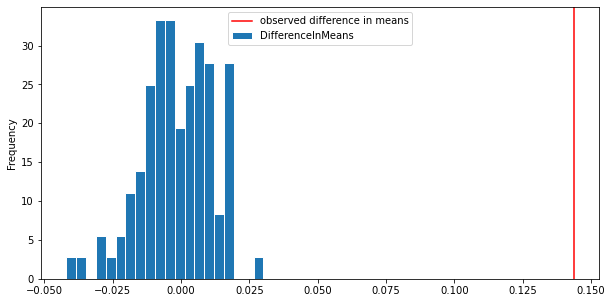

In [45]:
bpd.DataFrame().assign(DifferenceInMeans=differences).plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5));
plt.axvline(observed_diff, color='red', label='observed difference in means');
plt.legend();

**Question 2.5.** (1 point) Assign `goodness_p` to the proportion of times in our simulation that we saw a difference in means equal to the observed difference or more extreme in the direction of the alternative hypothesis.

<!--
BEGIN QUESTION
name: q2_5
points: 1
-->

In [46]:
goodness_p = np.count_nonzero(differences >= observed_diff)/len(differences)
goodness_p

0.0

In [47]:
grader.check("q2_5")

q2_5 results: All test cases passed!

Our histogram and p-value show it's unlikely that a difference in means as extreme as the one we observed could have happened by chance, according to our null hypothesis. Per any reasonable p-value cutoff, we'd reject the null hypothesis in this case, and conclude that DC characters are more "good" than Marvel characters, on average. 

We've now statistically justified what DC fans have been saying for decades: "DC characters are *better* than Marvel characters!" 👊

<a name='q3'></a>

### Question 3: Male vs. female Marvel characters 🙋‍♂️🙋‍

Next, we'll do another permutation test to compare the goodness of male and female Marvel characters.

However, instead of writing code specifically for this one example, in this question you will write code that will ultimately allow you to repeat a permutation test for **any** two groups of characters with just a single function call. Throughout this question, it will help to use your code from Question 2 as a starting point and generalize it.

**Question 3.1.** (1 point) Complete the implementation of the function `add_good`, which takes in a DataFrame `df` and returns only the rows in `df` where there is data in the `'ALIGN'` column (i.e., all of the rows where the value in `'ALIGN'` isn't `'Data Unavailable'`). The returned DataFrame should also have one additional column, called `'GOOD'`, which contains the numerical goodness of each character as defined in Question 2.2.

_Hint:_ If you defined your own function in Question 2.2, you may want to use it again here.

<!--
BEGIN QUESTION
name: q3_1
points: 1
-->

In [48]:
def add_good(df):
    '''Returns a new DataFrame with a GOOD column and keeps 
    only the rows of the input DataFrame with available alignment data.'''
    intel = df[df.get('ALIGN') != 'Data Unavailable']
    return intel.assign(GOOD = intel.get('ALIGN').apply(numgood))

In [49]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2.** (1 point) Let's create a DataFrame with only the rows and columns we'll use in our permutation test. Assign `male_female` to a DataFrame containing rows for only the Marvel characters that are male or female. `male_female` should only have two columns, `'SEX'` and `'GOOD'`, as defined above.

<!--
BEGIN QUESTION
name: q3_2
points: 1
-->

In [50]:
fema = marvel[(marvel.get('SEX') == 'Male Characters') | (marvel.get('SEX') == 'Female Characters')]
male_female = add_good(fema).get(['SEX', 'GOOD'])
male_female

,SEX,GOOD
name,,
Spider-Man (Peter Parker),Male Characters,1
Captain America (Steven Rogers),Male Characters,1
"Wolverine (James \""Logan\"" Howlett)",Male Characters,0
"Iron Man (Anthony \""Tony\"" Stark)",Male Characters,1
Thor (Thor Odinson),Male Characters,1
...,...,...
Melanie Kapoor (Earth-616),Female Characters,1
Ru'ach (Earth-616),Male Characters,-1
Thane (Thanos' son) (Earth-616),Male Characters,1


In [51]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3.** (4 points) In Questions 2.4 and 2.5, you...

1. computed 100 simulated differences in the mean goodness of two groups in particular (DC and Marvel), 
2. drew a histogram of the simulated differences, with a vertical red line placed at the observed difference in means, and
3. computed a p-value, which was the proportion of simulations in which the simulated difference in means was equal to the observed difference in means or more extreme in the direction of the alternative hypothesis

Below, complete the implementation of the function `permutation_test`. It should do all three steps above, but for any two groups. `permutation_test` takes in the same 5 arguments as `diff_of_means`, which you defined in Question 2.3. (It contains an additional optional argument, `for_autograder`; you should ignore this.)

Remember that we've defined the difference in group means to be `group_1`'s mean minus `group_2`'s mean. So, if the observed difference in means is positive, this suggests that the mean of `group_1` may be *larger* than the mean of `group_2`. In that case, we'll formulate our null and alternative hypotheses like this:

- **Null hypothesis:** `group_1`'s data and `group_2`'s data come from the same distribution.
- **Alternative hypothesis:** `group_1` has larger data values than `group_2`, on average.

This is the setup we used in Question 2 when comparing DC characters (`group_1`) to Marvel characters (`group_2`), because the observed difference in means was positive.

Conversely, if the observed difference in means is negative, this suggests that the mean of `group_1` may be *smaller* than the mean of `group_2`. In that case, we'll formulate our null and alternative hypotheses like this:

- **Null hypothesis:** `group_1`'s data and `group_2`'s data come from the same distribution.
- **Alternative hypothesis:** `group_1` has smaller data values than `group_2`, on average.

How you set up the null and alternative hypotheses has implications for how you calculate the p-value since the p-value represents the proportion of simulations in which the simulated difference in means was equal to the observed difference in means or more extreme *in the direction of the alternative hypothesis*. 

<!--
BEGIN QUESTION
name: q3_3
points: 4
-->

In [52]:
def permutation_test(df, group_column, group_1, group_2, data_column, for_autograder=False):
    '''Performs a permutation test to compare group means for group_1 and group_2, 
    draws a histogram, and returns a p-value. '''
    np.random.seed(4242) # Don't change this!
    
    n_repetitions = 100

    differences = np.array([])
    
    # Do the simulation to build an array of simulated differences in group means.
    for i in np.arange(n_repetitions):
        shuffled_stat = np.random.permutation(df.get(data_column))
        shuffled = df.assign(Shuffled = shuffled_stat)
        differ = diff_of_means(shuffled, group_column, group_1, group_2, 'Shuffled')
        differences = np.append(differences, differ)
        
    # Calculate observed difference of group means.
    observed_difference = diff_of_means(df, group_column, group_1, group_2, data_column)
    
    # Plot histogram.
    if not for_autograder:
        bpd.DataFrame().assign(DifferenceInMeans=differences).plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5));
        plt.axvline(observed_difference, color='red', label='observed difference in means');
        plt.legend();
    
    # Calculate p-value.
    if observed_difference > 0:
        p_value = np.count_nonzero(differences >= observed_difference)/len(differences)
    else:
        p_value = np.count_nonzero(differences <= observed_difference)/len(differences)
    return p_value

In [53]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4.** (1 point) Use your newly-defined `permutation_test` function to determine a p-value for a permutation test comparing the goodness of male (`group_1`) and female (`group_2`) Marvel characters. Save your result as `male_female_p`.

As with question 2.4, it might take up to a couple of minutes for this permutation test to run.

<!--
BEGIN QUESTION
name: q3_4
points: 1
-->

0.0

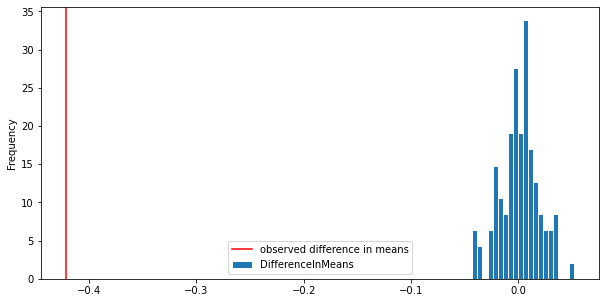

In [54]:
male_female_p = permutation_test(male_female, 'SEX', 'Male Characters', 'Female Characters', 'GOOD')
male_female_p

In [55]:
grader.check("q3_4")

q3_4 results: All test cases passed!

**Question 3.5.** (1 point) Which of the following is the best interpretation of the results of your permutation test? Assign `male_female_conclusion` to either 1, 2, or 3.

1. Our data is consistent with the null hypothesis that male and female Marvel characters are equally good, on average.
2. Our results suggest that female Marvel characters are significantly more good than male Marvel characters, on average.
2. Our results suggest that male Marvel characters are significantly more good than female Marvel characters, on average.

<!--
BEGIN QUESTION
name: q3_5
points: 1
-->

In [56]:
male_female_conclusion = 2

In [57]:
grader.check("q3_5")

q3_5 results: All test cases passed!

<a name='q4'></a>

### Question 4: Even more comparisons 🆚

Now that we have a framework to perform a permutation test, we can easily compare different demographics to see if one group is statistically significantly more good than another group. 

For each pair of groups in the table below, assign 1, 2, or 3 to the given variable name, according to this scheme:
1. Group 1 is more good than Group 2 (at the 0.05 significance level).
2. Group 2 is more good than Group 1 (at the 0.05 significance level).
3. Neither group is statistically significantly more good than the other (at the 0.05 significance level).

| Group 1  | Group 2  | Variable Name |
|---|---|---|
| DC Living | DC Deceased  | `living_test` |
| DC Blond Hair | DC Black Hair  | `hair_test` |
| DC Secret Identity | DC Public Identity  | `identity_test` |
| DC GSM Minority  | DC Not Minority  | `minority_test` |

**Be careful**: even though you'll be comparing two groups, not all characters will necessarily fall into one of those two groups, as some variables have more than two distinct values. When calling `permutation_test`, make sure that the DataFrame you give it only has rows for the two groups that you're trying to compare, otherwise the results of your permutation test will be invalid.

**Important**: All you need to do for Question 4 is set each of the variables in the table above to 1, 2, or 3. You'll do this in the cells provided. Of course, you'll need to do some work to figure out the correct answer choice. Please follow these instructions:
- Add new cells as needed to do the work required to determine the correct answer choice. You can add new cells by clicking the plus sign icon in the top menu.
- Assign the variable to the correct answer choice in the cell provided.
- Before you submit, convert any cells you added to 'Raw NBConvert' format. To change the format of a cell, click the down arrow next to the word 'Code' in the top menu and select 'Raw NBConvert' from the dropdown menu. If you need to modify your work later, you can convert these cells back to code. Make sure that any cells you added are in 'Raw NBConvert' format before submitting, but that the cells that we originally provided you with are still in the original 'Code' format.

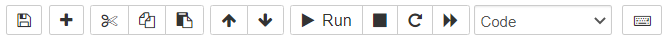

As we mentioned earlier, the `permutation_test` function is very slow to run on our datasets, since they are so large. You'll have to run `permutation_test` to determine the correct answer to each of the four subparts of this question, but by following the steps above, you'll ensure that your submission will run quickly on the Gradescope autograder.

**Question 4.1.** (2 points) First, compare DC characters who are living (group 1) with those that are deceased (group 2). The `'ALIVE'` column contains whether each character is living or deceased.

In the cell provided, assign the variable `living_test` to 1, 2, or 3, according to the instructions at the top of Question 4. 

Do all of your work in separate cells, and remember to change the format of any cells you added to 'Raw NBConvert' before submitting.

In [58]:
# Just assign this variable to 1, 2, or 3. Don't do anything else in this cell.
living_test = 1

In [59]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2.** (2 points) Next, compare DC characters with blond hair (group 1) to DC characters with black hair (group 2). The `'HAIR'` column contains the hair color of each character.

In the cell provided, assign the variable `hair_test` to 1, 2, or 3, according to the instructions at the top of Question 4. 

Do all of your work in separate cells, and remember to change the format of any cells you added to 'Raw NBConvert' before submitting.

<!--
BEGIN QUESTION
name: q4_2
points: 2
-->

In [60]:
# Just assign this variable to 1, 2, or 3. Don't do anything else in this cell.
hair_test = 3

In [61]:
grader.check("q4_2")

q4_2 results: All test cases passed!

**Question 4.3.** (2 points) Next, compare DC characters with secret identities (group 1) to DC characters with public identities (group 2). The `'ID'` column contains the identity status of each character.

In the cell provided, assign the variable `identity_test` to 1, 2, or 3, according to the instructions at the top of Question 4. 

Do all of your work in separate cells, and remember to change the format of any cells you added to 'Raw NBConvert' before submitting.
<!--
BEGIN QUESTION
name: q4_3
points: 2
-->

In [62]:
# Just assign this variable to 1, 2, or 3. Don't do anything else in this cell.
identity_test = 2

In [63]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.4.** (2 points) Finally, compare DC characters who are a gender or sexual minority (group 1) to DC characters who are not a gender or sexual minority (group 2). The `'GSM'` column contains information about whether or not each character is a gender or sexual minority.

Before you proceed, note that there are three unique values in the `'GSM'` column of `dc`. One of them is `'Not Minority'`; both of the other two should be counted as `'Minority'` for the purposes of this test. This means that before calling `permutation_test`, you'll need to create a function and use it with `.apply` to create a DataFrame with a new column containing only the values `'Not Minority'` and `'Minority'`.

In the cell provided, assign the variable `living_test` to 1, 2, or 3, according to the instructions at the top of Question 4. 

Do all of your work in separate cells, and remember to change the format of any cells you added to 'Raw NBConvert' before submitting.

<!--
BEGIN QUESTION
name: q4_4
points: 2
-->

In [64]:
# Just assign this variable to 1, 2, or 3. Don't do anything else in this cell.
minority_test = 1

In [65]:
grader.check("q4_4")

q4_4 results: All test cases passed!

Nice work! You've now compared many different groups of characters. See how having a function to do the permutation testing in general was really helpful? If there's any other groups of characters you're curious about, you can use the same framework to explore some more.

Before moving on, make sure that any cells you added are in 'Raw NBConvert' format, and that you didn't accidentally change any provided cells to 'Raw NBConvert'. 

<a name='part3'></a>

## Part 3: Fact or cap?  🧢

In this part, we'll use the power of the bootstrap to evaluate the validity of two claims involving character demographics.

<a name='q5'></a>
### Question 5: What could have been... 💭

DC Bigshot, the comics forum user from Part 1, is still bitter about something that happened in the 1980s. DC Bigshot rants online that they had a brilliant idea for a new comic character but the character never made it past management.  The character would have had red hair and blue eyes. DC Bigshot claims that the character probably would have been a big hit and had several hundred appearances by now. 

<img src="images/girl.jpg" width="150">

We want to get a sense of how many appearances typical red-haired, blue-eyed DC characters from the 1980s have, by bootstrapping to estimate the median number of appearances of such characters. We'll treat the data in our `dc` DataFrame as a random sample from a larger population that includes more DC characters. Our goal is to use this sample to estimate a population parameter – the median number of appearances of red-haired, blue-eyed DC characters from the 1980s.

**Question 5.1.** (1 point) Assign `with_decade` to a DataFrame with all of the columns in `dc`, plus a new `'DECADE'` column of type `int` containing the decade in which each character was introduced.

For example, all characters with a `'YEAR'` value between 1940 and 1949 should have a `'DECADE'` value of 1940.

<!--
BEGIN QUESTION
name: q5_1
points: 1
-->

In [66]:
np.unique(dc.get('YEAR').to_numpy())

array([   0, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013])

In [67]:
def dec(year):
    if year >= 2010:
        return 2010
    elif year >= 2000:
        return 2000
    elif year >= 1990:
        return 1990
    elif year >= 1980:
        return 1980
    elif year >= 1970:
        return 1970
    elif year >= 1960:
        return 1960
    elif year >= 1950:
        return 1950
    elif year >= 1940:
        return 1940
    elif year >= 1930:
        return 1930
    else:
        return 0
with_decade = dc.assign(DECADE = dc.get('YEAR').apply(dec))
with_decade

,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,YEAR,DECADE
name,,,,,,,,,,
Batman (Bruce Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,3093,1939,1930
Superman (Clark Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,2496,1986,1980
Green Lantern (Hal Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Not Minority,Living Characters,1565,1959,1950
James Gordon (New Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Not Minority,Living Characters,1316,1987,1980
Richard Grayson (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,1237,1940,1940
...,...,...,...,...,...,...,...,...,...,...
Nadine West (New Earth),Public Identity,Good Characters,Data Unavailable,Data Unavailable,Female Characters,Not Minority,Living Characters,0,0,0
Warren Harding (New Earth),Public Identity,Good Characters,Data Unavailable,Data Unavailable,Male Characters,Not Minority,Living Characters,0,0,0
William Harrison (New Earth),Public Identity,Good Characters,Data Unavailable,Data Unavailable,Male Characters,Not Minority,Living Characters,0,0,0


In [68]:
grader.check("q5_1")

q5_1 results: All test cases passed!

**Question 5.2.** (1 point) Now, assign `dc_red_blue_80s` to a DataFrame containing only DC characters with red hair and blue eyes from the 1980s for whom we know the number of appearances.

<!--
BEGIN QUESTION
name: q5_2
points: 1
-->

In [69]:
dc_red_blue_80s = with_decade[(with_decade.get('DECADE') == 1980) 
                              & (with_decade.get('HAIR') == 'Red Hair') 
                              & (with_decade.get('EYE') == 'Blue Eyes') 
                              & (with_decade.get('APPEARANCES') != 0)]
dc_red_blue_80s

,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,YEAR,DECADE
name,,,,,,,,,,
Terrence Long (New Earth),Public Identity,Good Characters,Blue Eyes,Red Hair,Male Characters,Not Minority,Deceased Characters,116,1981,1980
Holly Robinson (New Earth),Secret Identity,Good Characters,Blue Eyes,Red Hair,Female Characters,Homosexual Characters,Living Characters,114,1987,1980
Emily Briggs (New Earth),Public Identity,Good Characters,Blue Eyes,Red Hair,Female Characters,Not Minority,Living Characters,107,1985,1980
Lorraine Reilly (New Earth),Secret Identity,Good Characters,Blue Eyes,Red Hair,Female Characters,Not Minority,Living Characters,98,1982,1980
Danette Reilly (New Earth),Secret Identity,Good Characters,Blue Eyes,Red Hair,Female Characters,Not Minority,Living Characters,91,1981,1980
...,...,...,...,...,...,...,...,...,...,...
Red Dragon (New Earth),Data Unavailable,Bad Characters,Blue Eyes,Red Hair,Female Characters,Not Minority,Living Characters,5,1988,1980
Broderick (New Earth),Public Identity,Bad Characters,Blue Eyes,Red Hair,Male Characters,Not Minority,Living Characters,3,1987,1980
Matvei Rodor (New Earth),Public Identity,Bad Characters,Blue Eyes,Red Hair,Male Characters,Not Minority,Living Characters,2,1988,1980


In [70]:
grader.check("q5_2")

q5_2 results: All test cases passed!

**Question 5.3.** (2 points) The rows in `dc_red_blue_80s` constitute our sample of DC characters with red hair and blue eyes from the 1980s. Below, use the bootstrap procedure to generate 5000 bootstrapped resamples of this sample. Compute the median of each resample, and store these medians in the array `boot_medians`.

<!--
BEGIN QUESTION
name: q5_3
points: 2
-->

In [71]:
np.random.seed(401) # Don't change this!

n_resamples = 5000
boot_medians = np.array([])

for i in range(n_resamples):
    boot_rb = dc_red_blue_80s.sample(dc_red_blue_80s.shape[0], replace = True)
    boot_med = boot_rb.get('APPEARANCES').median()
    boot_medians = np.append(boot_medians,boot_med)
# Just display the first ten boostrapped medians.
boot_medians[:10]

array([44. , 19. , 38. , 42.5, 28. , 31. , 37. , 40.5, 35. , 35. ])

In [72]:
grader.check("q5_3")

q5_3 results: All test cases passed!

Run the cell below to visualize the distribution of your bootstrapped medians.

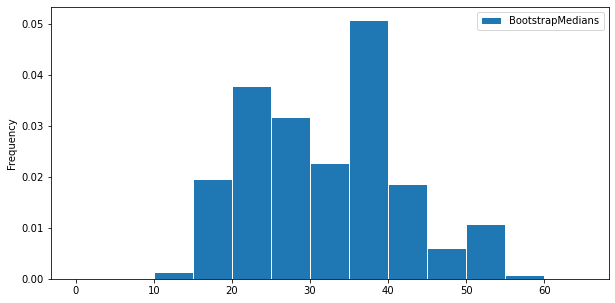

In [73]:
bpd.DataFrame().assign(BootstrapMedians=boot_medians).plot(kind='hist', density=True, ec='w', bins=np.arange(0, 70, 5), figsize=(10, 5));

**Question 5.4.** (1 point) Assign `q5_hist` to the number of the true statement below.
1. This histogram is not especially bell-shaped, but it would look more bell-shaped if we did more repetitions of the bootstrap.
2. This histogram is not especially bell-shaped, but it would look more bell-shaped if we had started with a larger sample.
3. Even if we increased the sample size and number of repetitions, this histogram probably wouldn't look bell-shaped.

In [74]:
q5_hist = 3

In [75]:
grader.check("q5_4")

q5_4 results: All test cases passed!

**Question 5.5.** (1 point) Assign `left_endpoint` and `right_endpoint` to the left and right endpoints of a 95% confidence interval for the true median number of appearances of all DC characters with red hair and blue eyes from the 1980s.

<!--
BEGIN QUESTION
name: q5_5
points: 1
-->

In [76]:
left_endpoint = np.percentile(boot_medians, 2.5)
right_endpoint = np.percentile(boot_medians, 97.5)

# Your interval is
[left_endpoint, right_endpoint]

[17.0, 50.0]

In [77]:
grader.check("q5_5")

q5_5 results: All test cases passed!

**Question 5.6.** (1 point) Which of the following is a correct interpretation of our results? Assign `q5_interpretation` to 1, 2, 3, or 4.

1. There is a 95% chance that DC Bigshot's character would have had between `left_endpoint` and `right_endpoint` appearances.

2. 95% of red-haired blue-eyed DC characters from the 1980s had between `left_endpoint` and `right_endpoint` appearances.

3. There is a 95% chance that the median number of appearances of red-haired blue-eyed DC characters from the 1980s falls between `left_endpoint` and `right_endpoint`.

4. None of the above.

<!--
BEGIN QUESTION
name: q5_6
points: 1
-->

In [78]:
q5_interpretation = 4

In [79]:
grader.check("q5_6")

q5_6 results: All test cases passed!

<a name='q6'></a>
### Question 6: Nonbinary characters 🏳️‍🌈

Lately, Marvel has come under scrutiny for having very few nonbinary characters. A nonbinary individual is someone who does not identify as male or female. Marvel's CEO responds to the criticism with a statement emphasizing their commitment to enhancing character diversity. As part of this statement, the CEO states that while the proportion of their characters that are neither male nor female is admittedly small, that's just a reflection of reality, since the proportion of nonbinary people in the United States is small. 

Let's investigate this claim by looking at some data. To start, let's determine the proportion of Americans that are nonbinary. A recent pioneering study by the [Williams Institute at UCLA](https://williamsinstitute.law.ucla.edu/publications/nonbinary-lgbtq-adults-us/) estimated the number of nonbinary American adults to be 1.2 million. According to the [2020 US Census](https://www.census.gov/library/stories/2021/08/united-states-adult-population-grew-faster-than-nations-total-population-from-2010-to-2020.html#:~:text=In%202020%2C%20the%20U.S.%20Census,from%20234.6%20million%20in%202010.), there are 258.3 million American adults. Thus, the proportion of American adults that are nonbinary is:

In [80]:
nonbinary_prop_reality  = 1.2 / 258.3
nonbinary_prop_reality

0.004645760743321719

**Question 6.1.** (1 point) In the `marvel` DataFrame, what proportion of characters with available data in the `'SEX'` column are nonbinary? Save your result as `nonbinary_prop_marvel`.

<!--
BEGIN QUESTION
name: q6_1
points: 1
-->

In [81]:
np.unique(marvel.get('SEX').to_numpy())

array(['Agender Characters', 'Data Unavailable', 'Female Characters',
       'Genderfluid Characters', 'Male Characters'], dtype=object)

In [82]:
nonbinary_prop_marvel = marvel[(marvel.get('SEX') != 'Male Characters') 
                                         & (marvel.get('SEX') != 'Female Characters')].shape[0]/marvel.shape[0]
nonbinary_prop_marvel

0.055019540791402054

In [83]:
grader.check("q6_1")

q6_1 results: All test cases passed!

It appears that in the sample of Marvel characters for which we have data, the proportion of nonbinary characters is slightly different than the proportion of nonbinary Americans, `nonbinary_prop_reality`. But is this difference present in the population of all Marvel characters, or just in our sample? Let's conduct a hypothesis test to find out.

- **Null Hypothesis:** The proportion of nonbinary Marvel characters equals the proportion of nonbinary Americans. 

- **Alternative Hypothesis:** The proportion of nonbinary Marvel characters is not equal to the proportion of nonbinary Americans. 

Since we were able to set up our hypothesis test as a question of whether a certain population parameter – the proportion of nonbinary characters among all Marvel characters – is equal to a certain known value, we can **test our hypotheses by constructing a confidence interval** for the parameter. We want to be really sure about this, so we'll test at the 0.01 significance level. 

To construct a 99% confidence interval for the proportion of nonbinary characters among all Marvel characters, we need to bootstrap the sample of data we have and create many estimates for that population proportion, then take the middle 99% of those estimates.

**Question 6.2.** (1 point) Before we can conduct this hypothesis test, we need a column that tells us whether a character is nonbinary.

Below, assign `nonbinary_df` to a DataFrame with the same columns as `marvel` but with an additional column, `'NONBINARY'`, that contains the value 1 for nonbinary characters and 0 for male or female characters. Only include rows where we have data on the `'SEX'` of the character.

<!--
BEGIN QUESTION
name: q6_2
points: 1
-->

In [84]:
def nb(sex):
    if sex == 'Male Characters' or sex == 'Female Characters':
        return 0
    else:
        return 1
knownsex = marvel[marvel.get('SEX') != 'Data Unavailable']
nonbinary_df = knownsex.assign(NONBINARY = knownsex.get('SEX').apply(nb))
nonbinary_df

,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,YEAR,NONBINARY
name,,,,,,,,,,
Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Not Minority,Living Characters,4043,1962,0
Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Not Minority,Living Characters,3360,1941,0
"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,3061,1974,0
"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,2961,1963,0
Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Not Minority,Living Characters,2258,1950,0
...,...,...,...,...,...,...,...,...,...,...
Melanie Kapoor (Earth-616),Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,Not Minority,Living Characters,0,0,0
Ru'ach (Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,Not Minority,Living Characters,0,0,0
Thane (Thanos' son) (Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,Not Minority,Living Characters,0,0,0


In [85]:
grader.check("q6_2")

q6_2 results: All test cases passed!

**Question 6.3.** (3 points) Now, implement the bootstrap procedure to create an array called `boot_proportions` containing 10,000 estimates for the proportion of nonbinary Marvel characters.

Instead of using `.sample` with `replace=True` like you'd normally do for bootstrapping, here's a clever strategy that allows you to calculate resample proportions without the `.sample` method, which can be slow.

Since the `'NONBINARY'` column contains only 0s and 1s and bootstrapping requires us to sample with replacement, this means each element of our resample has a certain probability of being a 0 and some other probability of being a 1. These probabilities should add up to one. You can think of resampling from a sample of 0's and 1's as a lot like flipping a biased coin. You can find the proportion of 1's in your resample in much the same way you might find the proportion of heads in many coin flips, using `np.random.multinomial`. (It's also possible to do this with `np.random.choice`, but please use `np.random.multinomial` here.)

This alternate strategy adds up to a huge time savings. With `.sample`, it takes about 1 minute to do 100 repetitions of the bootstrap on a DataFrame of this size, which means to do 10,000 repetitions, it would take about 100 minutes (over an hour 🥱). With `np.random.multinomial`, you should be able to do 10,000 repetitions of the bootstrap in only a few seconds!

**Do not use `.sample` or `np.random.choice` for this problem. You must use `np.random.multinomial`.**

<!--
BEGIN QUESTION
name: q6_3
points: 3
-->

In [86]:
np.random.seed(999) # Don't change this!

boot_proportions = np.array([])
for i in np.arange(10000):
    boot_sex = np.random.multinomial(nonbinary_df.shape[0],[nonbinary_prop_reality, 1-nonbinary_prop_reality])
    boot_prop = boot_sex[0]/nonbinary_df.shape[0]
    boot_proportions = np.append(boot_proportions,boot_prop)
# Just display the first ten proportions.
boot_proportions[:10]

array([0.00425203, 0.00450973, 0.00489628, 0.00515398, 0.00508955,
       0.00476743, 0.0044453 , 0.0044453 , 0.00476743, 0.00554052])

In [87]:
grader.check("q6_3")

q6_3 results: All test cases passed!

Run the cell below to visualize the distribution of your bootstrapped proportions.

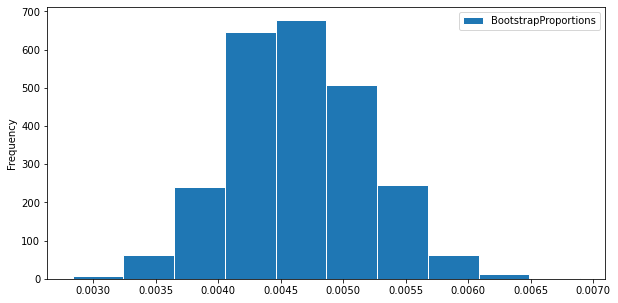

In [88]:
bpd.DataFrame().assign(BootstrapProportions=boot_proportions).plot(kind='hist', density=True, ec='w', figsize=(10, 5));

**Question 6.4.** (1 point) Assign `nonbinary_left` and `nonbinary_left` to the left and right endpoints of a 99% confidence interval for the true proportion of nonbinary Marvel characters.

<!--
BEGIN QUESTION
name: q6_4
points: 1
-->

In [89]:
nonbinary_left = np.percentile(boot_proportions, 0.5)
nonbinary_right = np.percentile(boot_proportions, 99.5)

# Your interval is
[nonbinary_left, nonbinary_right]

[0.0033500837520938024, 0.006120345316325216]

In [90]:
grader.check("q6_4")

q6_4 results: All test cases passed!

**Question 6.5.** (1 point) Use your confidence interval to decide whether to reject the null hypothesis at the 0.01 significance level. Set `reject_null` to `True` if we should reject the null hypothesis, and `False` if not. Then, assign `q6_interpretation` to either 1, 2, 3, or 4, depending on which of the following four statements is best supported by the data.

1. The CEO was definitely wrong. 
2. The CEO was likely wrong.
3. The CEO was likely right.
4. The CEO was definitely right.

<!--
BEGIN QUESTION
name: q6_5
points: 1
-->

In [91]:
nonbinary_prop_marvel > nonbinary_right

True

In [92]:
reject_null = True
q6_interpretation = 2

In [93]:
grader.check("q6_5")

q6_5 results: All test cases passed!

<a name='part4'></a>

## Part 4: Fun and games 🎮

In this final section of the project, we will switch our focus to probability.

<a name='q7'></a>

### Question 7: Guess who? 🤔

You and your friend like quizzing each other on your knowledge of comic characters from both companies. Your friend chooses a single character at random from the `all_characters` DataFrame. They then tell you one piece of information about that character, and you have to guess which character they're talking about.

In [94]:
all_characters

,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,YEAR,COMPANY
name,,,,,,,,,,
Batman (Bruce Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,3093,1939,DC
Superman (Clark Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,2496,1986,DC
Green Lantern (Hal Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Not Minority,Living Characters,1565,1959,DC
James Gordon (New Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Not Minority,Living Characters,1316,1987,DC
Richard Grayson (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Not Minority,Living Characters,1237,1940,DC
...,...,...,...,...,...,...,...,...,...,...
Ru'ach (Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,Not Minority,Living Characters,0,0,Marvel
Thane (Thanos' son) (Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,Not Minority,Living Characters,0,0,Marvel
Tinkerer (Skrull) (Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,Not Minority,Living Characters,0,0,Marvel


**Note:** All of Question 7 relies on `all_characters` being defined correctly, so make sure you've completed Question 2.1 correctly before proceeding.

**Question 7.1.** (1 point) Your friend picks a character at random and tells you that they have blue eyes. What is the probability that the character is Superman (Clark Kent)? Assign your answer to the variable `p_superman_given_blue_eyes`.

_Hint:_ Start by determining the number of characters with blue eyes.

<!--
BEGIN QUESTION
name: q7_1
points: 1
-->

In [95]:
p_superman_given_blue_eyes = 1/np.count_nonzero(all_characters.get('EYE') == 'Blue Eyes')
p_superman_given_blue_eyes

0.00032637075718015666

In [96]:
grader.check("q7_1")

q7_1 results: All test cases passed!

**Question 7.2.** (1 point) As you saw above, the probability of correctly guessing your friend's character given just one piece of information is extremely low. So, instead of guessing the name of the character your friend is talking about, you will try and guess some other information about them, like whether or not they are good, or what their hair color is.

Your friend picks a character at random and tells you that they're a DC character. What is the probability that they are a good character (meaning that their value in the `'ALIGN'` column is `'Good Characters'`)? Assign your answer to the variable `p_good_given_dc`.

<!--
BEGIN QUESTION
name: q7_2
points: 1
-->

In [97]:
p_good_given_dc = dc[dc.get('ALIGN') == 'Good Characters'].shape[0]/dc.shape[0]
p_good_given_dc

0.41067285382830626

In [98]:
grader.check("q7_2")

q7_2 results: All test cases passed!

**Question 7.3.** (1 point) Now your friend picks a character at random and tells you that they're a good character (defined the same way as in the previous subpart). What is the probability that they are a DC character? Assign your answer to the variable `p_dc_given_good`.

<!--
BEGIN QUESTION
name: q7_3
points: 1
-->

In [99]:
p_dc_given_good = all_characters[(all_characters.get('ALIGN') == 'Good Characters') 
                & (all_characters.get('COMPANY') == 'DC')].shape[0] \
                /all_characters[all_characters.get('ALIGN') == 'Good Characters'].shape[0]
p_dc_given_good

0.37921799678628815

In [100]:
grader.check("q7_3")

q7_3 results: All test cases passed!

**Question 7.4.** (2 points) In both of the previous subparts, the code you wrote likely looked similar. Let's generalize these calculations so that we can more easily compute conditional probabilities.

In this subpart, you'll implement the function `conditional_probability`. It has two arguments, `find` and `given`, both of which are lists. Let's walk through how it works, using an example – suppose we want to use it to compute the probability that a randomly selected character from `all_characters` is from DC, given that they are good. (Note that this is the same probability that you computed in the previous subpart.)

- `find` is a list of two elements:
    - The first element in `find` is the column in `all_characters` that contains the event that we are trying to find the probability of. This can be any column in `all_characters`; in our example, this is `'COMPANY'`. 
    - The second element in `given` is the value in the aforementioned column that we're trying to find; in our example, this is `'DC'`.
- `given` is a list of two elements:
    - The first element in `given` is the column in `all_characters` that contains the event that we are given. This can also be any column in `all_characters`; in our example, this is `'ALIGN'`. 
    - The second element in `given` is the value in the aforementioned column; in our example, this is `'Good Characters'`.

Putting this all together, this means that `conditional_probability(['COMPANY', 'DC'], ['ALIGN', 'Good Characters'])` should evaluate to your answer from the previous part (but `conditional_probability` should work for any example, not just this one).

<!--
BEGIN QUESTION
name: q7_4
points: 2
-->

In [101]:
def conditional_probability(find, given):
    '''Returns the conditional probability of an event given a known condition.'''
    giver = all_characters[all_characters.get(given[0]) == given[1]]
    return giver[giver.get(find[0]) == find[1]].shape[0]/giver.shape[0]
    
# This should evalaute to your answer from the previous subpart
conditional_probability(['COMPANY', 'DC'], ['ALIGN', 'Good Characters'])

0.37921799678628815

In [102]:
grader.check("q7_4")

q7_4 results: All test cases passed!

**Question 7.5.** (1 point) Now, use the function `conditional_probability` to determine the following two probabilities:
- `p_blue_eyes_given_black_hair`: the probability that a randomly selected character has blue eyes given that they have black hair.
- `p_black_hair_given_blue_eyes`: the probability that a randomly selected character has black hair given that they have blue eyes.

<!--
BEGIN QUESTION
name: q7_5
points: 1
-->

In [103]:
p_blue_eyes_given_black_hair = conditional_probability(['EYE', 'Blue Eyes'], ['HAIR', 'Black Hair'])
p_black_hair_given_blue_eyes = conditional_probability(['HAIR', 'Black Hair'], ['EYE', 'Blue Eyes'])

# Don't change the code below.
print(f'''P(blue eyes given black hair) = {p_blue_eyes_given_black_hair}
P(black hair given blue eyes) = {p_black_hair_given_blue_eyes}''')

P(blue eyes given black hair) = 0.12084818915368738
P(black hair given blue eyes) = 0.21018276762402088


In [104]:
grader.check("q7_5")

q7_5 results: All test cases passed!

**Question 7.6.** (1 point) In the previous subpart, you computed two probabilities. Just by looking at those two probabilities, is it possible to determine which of the numbers below is larger?

- The number of characters with blue eyes in `all_characters`
- The number of characters with black hair in `all_characters`

Below, set `can_determine` to `True` if is possible to determine which number is larger based on these probabilities alone, and `False` if not.

<!--
BEGIN QUESTION
name: q7_6
points: 1
-->

In [105]:
can_determine = False

In [106]:
grader.check("q7_6")

q7_6 results: All test cases passed!

**Question 7.7.** (3 points) Your friend realizes that you're still pretty bad at this guessing game, and instead starts to give you multiple characteristics about their randomly selected character. However, the function `conditional_probability` only allows for a single given characteristic.

In this subpart, you'll complete the implementation of `conditional_probability_multiple`, which takes in two arguments, `find` and `given_list`.
- The list `find` is formatted the same way as it is for `conditional_probability`.
- The list `given_list` is a list of lists. Each of the lists inside `given_list` is formatted in the same way that the `given` list was formatted for `conditional_probability`; each list corresponds to a single condition.

For instance,

```py
conditional_probability_multiple(['ALIGN', 'Good Characters'], [['COMPANY', 'DC'], ['GSM', 'Not Minority']])
```

computes the probability that a randomly selected character from `all_characters` is good, given that they are a DC character and are not a gender or sexual minority.

<!--
BEGIN QUESTION
name: q7_7
points: 3
-->

In [107]:
def conditional_probability_multiple(find, given_list):
    '''Returns the conditional probability of an event given a list of known conditions.'''
    given_df = all_characters
    for given in given_list:
        given_df = given_df[given_df.get(given[0]) == given[1]]
    return given_df[given_df.get(find[0]) == find[1]].shape[0]/given_df.shape[0]
    
# This should evaluate to your answer from 7.4 – note that the second argument is a list of lists.
conditional_probability_multiple(['COMPANY', 'DC'], [['ALIGN', 'Good Characters']])

0.37921799678628815

In [108]:
grader.check("q7_7")

q7_7 results: All test cases passed!

**Question 7.8.** (1 point) Using `conditional_probability_multiple`, determine the probability that a randomly selected character from `all_characters` is from DC given that they have red hair and blue eyes. Assign your answer to the variable `p_dc_given_red_blue`.

<!--
BEGIN QUESTION
name: q7_8
points: 1
-->

In [109]:
p_dc_given_red_blue = conditional_probability_multiple(['COMPANY', 'DC'],[['HAIR', 'Red Hair'], ['EYE', 'Blue Eyes']])
p_dc_given_red_blue

0.4875

In [110]:
grader.check("q7_8")

q7_8 results: All test cases passed!

<a name='q8'></a>
### Question 8: BuzzFeed 🐝

Your friend gets tired of quizzing you about comic characters. You both decide to instead take a BuzzFeed quiz titled ["Which Marvel Character Are You Internally, And Which Are You Externally?"](https://www.buzzfeed.com/noradominick/marvel-character-inside-outside-quiz). (If you're looking to take a break from working on the project, take the quiz!)

<br>
<center><img src='images/buzzfeed.png' width=300>
    <i>A question from the BuzzFeed quiz.</i></center>

The way the quiz works is that you answer a few questions, and it gives you back the names of two different Marvel characters, one that represents your "internal" personality and one that represents your "external" personality. You and your friend notice something weird – you both selected the same answers to all questions, yet you got different results.

It turns out that the quiz actually does nothing with your answers. Instead, it randomly shows you characters for your internal and external personalities according to the following probability distributions:

| Character | Probability for Internal | Probability for External |
| --- | --- | --- |
| Spider-Man | 0.4 | 0.25 |
| Captain America | 0.12 | 0.15 |
| Wolverine | 0.1 | 0.37 |
| Iron Man | 0.09 | 0.08 |
| Thor | 0.29 | 0.15 |

Each time the quiz is completed, results are generated randomly according to the distributions listed above, separately for internal and external characters. Therefore, it is possible to get the same character for both your internal and external personality.

**Note that all subparts of this question are math questions, not coding questions.**

**Question 8.1.** (1 point) You take the quiz once. What is the probability that the quiz tells you that you're Wolverine internally and Spider-Man externally? Assign your answer to the variable `p_wolverine_spiderman`.

<!--
BEGIN QUESTION
name: q8_1
points: 1
-->

In [111]:
p_wolverine_spiderman = .1*.25
p_wolverine_spiderman

0.025

In [112]:
grader.check("q8_1")

q8_1 results: All test cases passed!

**Question 8.2.** (1 point) You take the quiz once. What is the probability that you get Iron Man as one of your characters and Thor as the other? Assign your answer to the variable `p_iron_thor`.

<!--
BEGIN QUESTION
name: q8_2
points: 1
-->

In [113]:
p_iron_thor = (.09*.15)+(.29*.08)
p_iron_thor

0.036699999999999997

In [114]:
grader.check("q8_2")

q8_2 results: All test cases passed!

**Question 8.3.** (1 point) You take the quiz once. What is the probability that the two characters the quiz gives you are different? Assign your answer to the variable `p_both_different`.

<!--
BEGIN QUESTION
name: q8_3
points: 1
-->

In [115]:
p_both_different = 1-(0.4*0.25+0.12*0.15+0.1*0.37+0.09*0.08+0.29*0.15)
p_both_different

0.7943

In [116]:
grader.check("q8_3")

q8_3 results: All test cases passed!

**Question 8.4.** (1 point) You and five other friends (so 6 people total) each take the quiz once. What is the probability that the quiz tells at least one person that they are Iron Man internally? Assign your answer to the variable `p_ironman_internal`.

<!--
BEGIN QUESTION
name: q8_4
points: 1
-->

In [117]:
p_ironman_internal = 1-(1-.09)**6
p_ironman_internal

0.43213074795899986

In [118]:
grader.check("q8_4")

q8_4 results: All test cases passed!

**Question 8.5.** (1 point) Again, suppose you and five other friends (so 6 people total) each take the quiz once. What is the probability that the quiz tells at least one person that they are Iron Man internally **or** externally? In other words, what is the probability that Iron Man appears at least once among the 12 characters that you and your friends receive? Assign your answer to the variable `p_ironman_internal_external`.

<!--
BEGIN QUESTION
name: q8_5
points: 1
-->

In [119]:
p_ironman_internal_external = 1-((1-.09)*(1-.08))**6
p_ironman_internal_external

0.655669638915463

In [120]:
grader.check("q8_5")

q8_5 results: All test cases passed!

<a name='q9'></a>
### Question 9: Action figure bundles 💥

This holiday season, Marvel and DC decide to put aside their differences and produce bundles of action figures consisting of characters from both companies.

The bundles will consist of randomly selected characters from among the 40 characters with the most appearances, across both Marvel and DC. As evidenced by the code below, of the top 40 characters, 10 are from DC and 30 are from Marvel.

In [121]:
all_characters.sort_values('APPEARANCES', ascending=False).take(np.arange(40)).groupby('COMPANY').count().get(['ID'])

,ID
COMPANY,
DC,10
Marvel,30


To create a bundle, we select 5 characters from this set of 40, in a way such that each of the 40 characters is equally likely to be chosen, and that characters can only be selected once.

**Question 9.1.** (1 point) What is the probability that a bundle of 5 characters consists solely of DC characters? Assign your answer to the variable `p_bundle_dc_only`.

_Note:_ This is a math problem, not a coding problem.

<!--
BEGIN QUESTION
name: q9_1
points: 1
-->

In [122]:
p_bundle_dc_only = (10/40)*(9/39)*(8/38)*(7/37)*(6/36)
p_bundle_dc_only

0.0003829740671845935

In [123]:
grader.check("q9_1")

q9_1 results: All test cases passed!

**Question 9.2.** (2 points) Now we're interested in determining the probability that a bundle of 5 characters consists of 2 DC characters (and thus 3 Marvel characters). In future data science courses, you will learn to compute probabilities like these exactly, but for now we'll turn to the power of simulation to approximate this probability.

Below, simulate 100,000 times the act of creating a bundle of 5 randomly selected characters. In each simulation, determine whether or not the number of DC characters was 2. Set `p_2_dc` to the approximate probability of this happening.

_Hint:_ Start by defining an array, `all_40_characters`, that contains the value `'DC'` 10 times and the value `'Marvel'` 30 times. **Do not** create this array by typing 40 strings manually. Also, remember that the same character cannot appear in a bundle twice.

<!--
BEGIN QUESTION
name: q9_2
points: 2
-->

In [124]:
np.repeat(['DC','Marvel'],[10,30])

array(['DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC',
       'Marvel', 'Marvel', 'Marvel', 'Marvel', 'Marvel', 'Marvel',
       'Marvel', 'Marvel', 'Marvel', 'Marvel', 'Marvel', 'Marvel',
       'Marvel', 'Marvel', 'Marvel', 'Marvel', 'Marvel', 'Marvel',
       'Marvel', 'Marvel', 'Marvel', 'Marvel', 'Marvel', 'Marvel',
       'Marvel', 'Marvel', 'Marvel', 'Marvel', 'Marvel', 'Marvel'],
      dtype='<U6')

In [125]:
np.random.seed(1126) # Don't change this!

all_40_characters = np.repeat(['DC','Marvel'],[10,30])

successes = np.array([])
n_reps = 100000 
for i in np.arange(n_reps):
    bundle = np.random.choice(all_40_characters, 5, replace = False)
    successes = np.append(successes, np.count_nonzero(bundle == 'DC') == 2)

p_2_dc = np.count_nonzero(successes)/len(successes)
p_2_dc

0.27627

In [126]:
successes

array([0., 1., 0., ..., 1., 0., 1.])

In [127]:
grader.check("q9_2")

q9_2 results: All test cases passed!

**Question 9.3.** (2 points) We're now interested in the probability that a bundle of 5 characters contains a different number of DC characters, not just 2. To do this, rather than writing many different simulations, your job is to write a single simulation that 100,000 times generates a bundle, counts the number of DC characters in that bundle, and stores the result in the array `simulated_dc_counts`. At the end, `simulated_dc_counts` will contain the number of DC characters in many simulated bundles, and you can use it to approximate the probability of a bundle containing 0, 1, 2, 3, 4, or 5 DC characters.

Complete the simulation below.

<!--
BEGIN QUESTION
name: q9_3
points: 2
-->

In [128]:
np.random.seed(1126) # Don't change this!

simulated_dc_counts = np.array([])
n_reps = 100000 
for i in np.arange(n_reps):
    bundle = np.random.choice(all_40_characters, 5, replace = False)
    simulated_dc_counts = np.append(simulated_dc_counts, np.count_nonzero(bundle == 'DC'))

# Just display the first ten counts.
simulated_dc_counts[:10]

array([3., 2., 0., 1., 2., 2., 0., 2., 1., 2.])

In [129]:
grader.check("q9_3")

q9_3 results: All test cases passed!

Now that you've completed the simulation, run the cell below to see the empirical distribution of the number of DC characters in a 5 character bundle. You should notice that the probability that all 5 characters are from DC is quite low, as you discovered in Question 9.1.

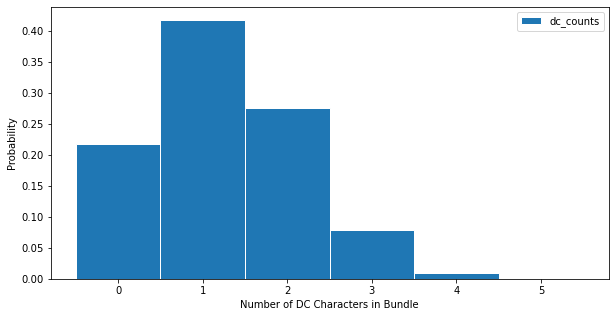

In [130]:
bpd.DataFrame().assign(dc_counts=simulated_dc_counts) \
               .plot(kind='hist', density=True, bins=np.arange(-0.5, 6.5, 1), ec='w',figsize=(10, 5));
plt.xlabel('Number of DC Characters in Bundle');
plt.ylabel('Probability');

**Question 9.4.** (1 point) In the histogram above, the most likely number of DC characters in a bundle should be clear. Assign `p_most_frequent` to the probability of the most likely number of DC characters in a bundle, according to our simulation.

<!--
BEGIN QUESTION
name: q9_4
points: 1
-->

In [131]:
p_most_frequent = np.count_nonzero(simulated_dc_counts == 1)/len(simulated_dc_counts)
p_most_frequent

0.41754

In [132]:
grader.check("q9_4")

q9_4 results: All test cases passed!

It doesn't seem like DC is getting a great deal out of this arrangement!

## Congratulations! You've completed Project 2!

If you're interested in learning more about the data and analysis that inspired this project, check out the article [Comic Books Are Still Made By Men, For Men And About Men](https://fivethirtyeight.com/features/women-in-comic-books/) from FiveThirtyEight. Here's a few visualizations from their analysis you may find interesting.

<br>
<center><img src='images/538_1.png' width=400><img src='images/538_2.png' width=400>
    <img src='images/538_3.png' width=400>
</center>

If you're not exactly in the mood to look at more data after completing this project, we don't blame you. How about winding down with a comic book or movie? Marvel's new movie, *Eternals*, is in theaters now! Or take a trip to Balboa Park to visit the brand new [Comic Con Museum](https://www.comic-con.org/museum), opening November 26!

## Submission Instructions

**Make sure that any cells you added in Question 4 are in 'Raw NBConvert' format, and that you didn't accidentally change any provided cells to 'Raw NBConvert'.**

As usual, follow these steps to submit your assignment:

1. Select Kernel -> Restart & Run All to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using File -> Download as -> Notebook (.ipynb), then upload your notebook to Gradescope. Don't forget to add your partner to your group on Gradescope!

If running all the tests at once causes a test to fail that didn't fail when you ran the notebook in order, check to see if you changed a variable's value later in your code. Make sure to use new variable names instead of reusing ones that are used in the tests. 

Remember, the tests here and on Gradescope just check the format of your answers. We will run correctness tests after the assignment's due date has passed.

In [133]:
grader.check_all()

q0_1 results: All test cases passed!

q0_2 results: All test cases passed!

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q1_6 results: All test cases passed!

q1_7 results: All test cases passed!

q1_8 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 results: All test cases passed!

q4_1 results: All test cases passed!

q4_2 results: All test cases passed!

q4_3 results: All test cases passed!

q4_4 results: All test cases passed!

q5_1 results: All test cases passed!

q5_2 results: All test cases passed!

q5_3 results